永豐API無spread資料

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import talib as ta
from talib import abstract
import datetime as dt


In [142]:
pkl_path = '/Users/xinc./Documents/GitHub/Quant_idea/data/0804 大社課 TXF 1m.pkl'
txf_path = '/Users/xinc./Documents/GitHub/Quant_idea/data/0804 大社課 TXF 1m.csv'
settlementDat_path = '/Users/xinc./Documents/GitHub/Quant_idea/data/0804 Settlement Date.csv'

df_pkl = pd.read_pickle(pkl_path)
df_txf = pd.read_csv(txf_path)
df_settlement = pd.read_csv(settlementDat_path)

txf開始

In [143]:
df_txf.index = pd.to_datetime(df_txf['datetime'])
df_txf.sort_index(inplace = True)
df_txf = df_txf.drop(columns = ['Date', 'Time', 'datetime', 'Unnamed: 0'])
df_txf.columns = ['open', 'high', 'low', 'close', 'volume']
df_txf['hour'] = df_txf.index.hour
df_txf.head()

open    high     low   close  volume  hour
datetime                                                         
2010-01-04 08:46:00  8203.0  8208.0  8184.0  8187.0    1108     8
2010-01-04 08:47:00  8187.0  8195.0  8186.0  8193.0     429     8
2010-01-04 08:48:00  8194.0  8201.0  8193.0  8200.0     419     8
2010-01-04 08:49:00  8200.0  8203.0  8198.0  8200.0     295     8
2010-01-04 08:50:00  8200.0  8201.0  8195.0  8197.0     187     8

settlement開始

In [144]:
df_settlement.columns = ['settlementDate', 'futures', 'settlementPrice']
settlementDate_ = df_settlement

In [145]:
# bool_ = [False if 'W' in i else True for i in settlementDate_['futures']]

assumptions of backtesting

In [146]:
rule = '3T'
Morning = df_txf[(df_txf['hour'] >= 8) & (df_txf['hour'] <= 13)]
Morning.index = Morning.index + dt.timedelta(minutes=15)
Morning.iloc[0:10]

open    high     low   close  volume  hour
datetime                                                         
2010-01-04 09:01:00  8203.0  8208.0  8184.0  8187.0    1108     8
2010-01-04 09:02:00  8187.0  8195.0  8186.0  8193.0     429     8
2010-01-04 09:03:00  8194.0  8201.0  8193.0  8200.0     419     8
2010-01-04 09:04:00  8200.0  8203.0  8198.0  8200.0     295     8
2010-01-04 09:05:00  8200.0  8201.0  8195.0  8197.0     187     8
2010-01-04 09:06:00  8198.0  8200.0  8195.0  8197.0     219     8
2010-01-04 09:07:00  8197.0  8200.0  8195.0  8196.0     207     8
2010-01-04 09:08:00  8196.0  8199.0  8195.0  8197.0     167     8
2010-01-04 09:09:00  8197.0  8198.0  8196.0  8196.0     124     8
2010-01-04 09:10:00  8197.0  8198.0  8197.0  8198.0      87     8

In [147]:
rule = '60T'

Morning = df_txf[(df_txf['hour'] >= 8) & (df_txf['hour'] <= 13)]
Morning.index = Morning.index + dt.timedelta(minutes=15)

d1 = Morning.resample(rule=rule, closed='right', label='left').first()[['open']]
d2 = Morning.resample(rule=rule, closed='right', label='left').max()[['high']]
d3 = Morning.resample(rule=rule, closed='right', label='left').min()[['low']]
d4 = Morning.resample(rule=rule, closed='right', label='left').last()[['close']]
d5 = Morning.resample(rule=rule, closed='right', label='left').sum()[['volume']]

df_Morning = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Morning = df_Morning.dropna()
df_Morning.index = df_Morning.index - dt.timedelta(minutes=15)
df_Morning.head()

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1840154299.py:6: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1840154299.py:7: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1840154299.py:8: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1840154299.py:9: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1840154299.py:10: FutureWarning:

'T' is deprecated and will be removed in a future version, please use 'min' instead.



open    high     low   close  volume
datetime                                                   
2010-01-04 08:45:00  8203.0  8211.0  8181.0  8187.0   17247
2010-01-04 09:45:00  8187.0  8188.0  8101.0  8165.0   31531
2010-01-04 10:45:00  8167.0  8180.0  8158.0  8172.0    8859
2010-01-04 11:45:00  8172.0  8207.0  8167.0  8197.0   12329
2010-01-04 12:45:00  8198.0  8200.0  8165.0  8166.0   13915

In [148]:
df_Morning = pd.concat([d1,d2,d3,d4,d5], axis=1)
df_Morning = df_Morning.dropna()
df_Morning.index = df_Morning.index - dt.timedelta(minutes=15)

In [149]:
# df_Morning['Month'] = df_Morning.index.map(lambda x: x.month)
# df_Morning['Weekday'] = df_Morning.index.map(lambda x: x.weekday)+1
df_Morning['hour'] = df_Morning.index.hour

In [150]:
trainData = df_Morning[(df_Morning.index >= '2010-01-01 00:00:00') & (df_Morning.index <= '2022-06-30 00:00:00')].copy()
testData = df_Morning[(df_Morning.index >= '2022-07-01 00:00:00') & (df_Morning.index <= '2024-06-30 00:00:00')].copy()

In [151]:
#參數設定
fund = 1000000
feePaid = 600
length = 15
NumStd = 1.5
K = 0.04

#指標計算
# trainData['H'] = trainData['high'].shift(1).rolling(window=length, center=False).max()
# trainData['L'] = trainData['low'].shift(1).rolling(window=length, center=False).min()
trainData['MA'] = trainData['close'].rolling(window=length, center=False).mean()
trainData['STD'] = trainData['close'].rolling(window=length, center=False).std()
trainData['upLine'] = trainData['MA'] + NumStd*trainData['STD']
trainData['downLine'] = trainData['MA'] - NumStd*trainData['STD']

trainData.tail(3)

open     high      low    close  volume  hour  \
datetime                                                                
2022-06-29 10:45:00  15083.0  15091.0  14994.0  15034.0   16523    10   
2022-06-29 11:45:00  15036.0  15066.0  15015.0  15051.0   11264    11   
2022-06-29 12:45:00  15051.0  15058.0  15007.0  15019.0   17675    12   

                               MA         STD        upLine      downLine  
datetime                                                                   
2022-06-29 10:45:00  15186.133333  130.383975  15381.709296  14990.557371  
2022-06-29 11:45:00  15190.466667  124.190445  15376.752334  15004.180999  
2022-06-29 12:45:00  15187.866667  127.525273  15379.154576  14996.578757

In [152]:
df_arr = np.array(trainData)
time_arr = np.array(trainData.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

#翻譯蒟蒻
# date_arr = []
# for i in time_arr:
#     date_arr.append(pd.to_datetime(i).date())

In [153]:
bool_ = [False if 'W' in i else True for i in settlementDate_['futures']]
len(list(settlementDate_[bool_]['futures']))
settlementDate = [i.replace('/','-') for i in list(settlementDate_[bool_]['settlementDate'])]
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]

做多

In [154]:
#建立存放資料的單位
BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

#開始交易流程
for i in range(len(df_arr)):

    #回測期間最後一天就跳出這個迴圈
    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    ### 當收盤價突破布林上軌
    entryLong = df_arr[i,3] > df_arr[i,8]
    ### 結算日不進場
    entryCondition = date_arr[i] not in settlementDate

    ## 出場邏輯
    ### 當收盤價跌破布林下軌
    exitShort = df_arr[i,3] <= df_arr[i,9]
    ### 結算日時放到結算
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    #做多的狀態
    if BS == 'B':
      # 停利停損條件
      stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-K)
      stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+K)

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    #還沒進場不用計算損益
    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        #確認進場&相關設定
        if entryLong and entryCondition:
            #更改狀態至做多
            BS = 'B'
            #紀錄進場時間
            t = i+1
            buy.append(t)
            print("Buy Price: {}, time: {}".format(df_arr[t,0], time_arr[t]))

    #進場開始計算未實現損益
    elif BS == 'B':

        profit = 200 * (df_arr[i+1,0] - df_arr[i,0])
        profit_list.append(profit)

        #近場條件達成，計算未實現損益-交易成本
        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
            pl_round = 200 * (df_arr[i+1,0] - df_arr[t,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)

            #紀錄出場時間
            sell.append(i+1)

            #重置交易狀態
            BS = None
            print("Sell Price: {}, time: {}".format(df_arr[i+1,0], time_arr[i+1]))
            print("Trade completed")
            print()


            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        #出場條件未達成，計算未實現損益
        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6));

Buy Price: 8335.0, time: 2010-01-07T08:45:00.000000000
Sell Price: 8240.0, time: 2010-01-13T09:45:00.000000000
Trade completed

Buy Price: 8343.0, time: 2010-01-15T09:45:00.000000000
Sell Price: 8277.0, time: 2010-01-19T10:45:00.000000000
Trade completed

Buy Price: 7310.0, time: 2010-02-09T10:45:00.000000000
Sell Price: 7574.0, time: 2010-02-22T12:45:00.000000000
Trade completed

Buy Price: 7553.0, time: 2010-03-01T10:45:00.000000000
Sell Price: 7525.0, time: 2010-03-04T11:45:00.000000000
Trade completed

Buy Price: 7681.0, time: 2010-03-05T09:45:00.000000000
Sell Price: 7634.0, time: 2010-03-15T10:45:00.000000000
Trade completed

Buy Price: 7849.0, time: 2010-03-18T09:45:00.000000000
Sell Price: 7788.0, time: 2010-03-22T09:45:00.000000000
Trade completed

Buy Price: 7901.0, time: 2010-03-26T11:45:00.000000000
Sell Price: 7940.0, time: 2010-04-01T08:45:00.000000000
Trade completed

Buy Price: 8018.0, time: 2010-04-01T09:45:00.000000000
Sell Price: 8059.0, time: 2010-04-08T12:45:00.000

做空

In [155]:
BS = None
sellshort = []
buytocover = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):

    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    entrySellShort = "Put your answer in the blank!"
    entryCondition = date_arr[i] not in settlementDate

    ## 出場邏輯
    exitBuyToCover = "Put your answer in the blank!"
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11

    if BS == 'S':
        stopLoss = df_arr[i,3] >= df_arr[t,0] * (1+K)
        stopProfit = df_arr[i,3] <= df_arr[t,0] * (1-K)

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entrySellShort and entryCondition:
            BS = 'S'
            t = i+1
            sellshort.append(t)
            print("sell short at {}".format(time_arr[t]))


    elif BS == 'S':
        profit = 200 * (df_arr[i,0] - df_arr[i+1,0])
        profit_list.append(profit)

        if exitBuyToCover or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
            pl_round = 200 * (df_arr[t,0] - df_arr[i+1,0])
            profit_fee = profit - feePaid*2
            profit_fee_list.append(profit_fee)
            buytocover.append(i+1)
            BS = None
            print("buytocover at {}".format(time_arr[i+1]))
            print("trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6))

sell short at 2010-01-04T09:45:00.000000000
buytocover at 2010-01-04T10:45:00.000000000
trade completed

sell short at 2010-01-04T11:45:00.000000000
buytocover at 2010-01-04T12:45:00.000000000
trade completed

sell short at 2010-01-05T08:45:00.000000000
buytocover at 2010-01-05T09:45:00.000000000
trade completed

sell short at 2010-01-05T10:45:00.000000000
buytocover at 2010-01-05T11:45:00.000000000
trade completed

sell short at 2010-01-05T12:45:00.000000000
buytocover at 2010-01-06T08:45:00.000000000
trade completed

sell short at 2010-01-06T09:45:00.000000000
buytocover at 2010-01-06T10:45:00.000000000
trade completed

sell short at 2010-01-06T11:45:00.000000000
buytocover at 2010-01-06T12:45:00.000000000
trade completed

sell short at 2010-01-07T08:45:00.000000000
buytocover at 2010-01-07T09:45:00.000000000
trade completed

sell short at 2010-01-07T10:45:00.000000000
buytocover at 2010-01-07T11:45:00.000000000
trade completed

sell short at 2010-01-07T12:45:00.000000000
buytocover 

<Axes: xlabel='datetime'>

做多加碼

In [156]:
BS = None
Position = 0
buy_price = 0
add_price = 0
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []
cost_list = []
rets = []

for i in range(len(df_arr)):

    #回測期間最後一天就跳出這個迴圈
    if i == len(df_arr)-1:
        break

    ## 進場邏輯
    #當收盤價突破布林上軌
    entryLong = df_arr[i,3] > df_arr[i,8]
    #結算日不進場
    entryCondition = date_arr[i] not in settlementDate

    ## 出場邏輯
    ### 當收盤價跌破布林下軌
    exitShort = df_arr[i,3] <= df_arr[i,9]
    ### 結算日時放到結算
    exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11


    ## 停利停損邏輯
    if BS == 'B':
        stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-K)
        stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+K)
        #做多狀態的加碼條件
        add_condition = df_arr[i, 0] > buy_price

#     if exitCondition == True:
#         print(f'{time_arr[i]}')

    if (BS == None) & (Position == 0):

        profit_list.append(0)
        profit_fee_list.append(0)

        if entryLong and entryCondition:
            BS = 'B'
            Position = 1
            t = i+1
            buy_price = df_arr[i+1, 0]
            #將第一次進場成本紀錄在這個list中
            cost_list.append(buy_price)
            buy.append(t)

    elif BS == 'B':

        profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) * Position
        profit_list.append(profit)


        if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
            if Position > 1:
              pl_round = 200 * ((Position*df_arr[i+1,0]) - np.sum(cost_list[-2:]))
            else:
              pl_round = 200 * ((Position*df_arr[i+1,0]) - cost_list[-1])
            profit_fee = profit - feePaid*2*Position
            profit_fee_list.append(profit_fee)
            sell.append(i+1)

            # Realized PnL
            profit_fee_realized = pl_round - feePaid*2*Position
            profit_fee_list_realized.append(profit_fee_realized)
            rets.append(profit_fee_realized/(200*df_arr[t,0]))
            #重置交易狀態
            BS = None
            #重置部位數量
            Position = 0
            #重置加碼參考價
            buy_price = 0
            #重置加碼成本
            add_price = 0


        #確認部位上限&加碼條件成立
        elif (Position <= 1) & add_condition:
            #更改部位數量
            add_price = df_arr[i+1, 0]
            #將第一次進場成本紀錄在這個list中
            cost_list.append(add_price)
            Position += 1

            profit_fee = profit
            profit_fee_list.append(profit_fee)

#             print("time: {}, Buy price: {} < Market Price: {}".format(time_arr[i], buy_price, df_arr[i, 0]))
#             print("add position at {}, {}".format(time_arr[i+1], df_arr[i+1, 0]))
#             print()

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)


equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
# print(equity)
equity.plot(grid=True, figsize=(12,6))

<Axes: xlabel='datetime'>

基本獲利指標
    獲利
    報酬率
    ＭＤＤ
    Calmar Ratio(大於1健康)
    交易次數
    勝率
    獲利因子(在看是不是做正確的事，正ＥＶ？)

In [157]:
import seaborn as sns
import matplotlib.pyplot as py
plt.style.use('ggplot')

In [158]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity']/equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax() #前n個元素的最大值
#print(profit_fee_list_realized)
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'][-1]/equity['equity'][0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy) + len(sellshort)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i>0]) / abs(sum([i for i in profit_fee_list_realized if i<0]))

print('Profit : ',profit)
print('Return : ',ret)
print('Max DrawDown : ',mdd)
print('Caimar Ratio : ',calmarRatio)
print('Trade Times : ',tradeTimes)
print('Win Rate : ',winRate)
print('Profit Factor : ',profitFactor)

Profit :  1967200.0
Return :  1.9672
Max DrawDown :  0.292885740683708
Caimar Ratio :  6.716612407991589
Trade Times :  7693
Win Rate :  0.4
Profit Factor :  1.241332777191648


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/2466104180.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022],
      dtype='int32', name='datetime')


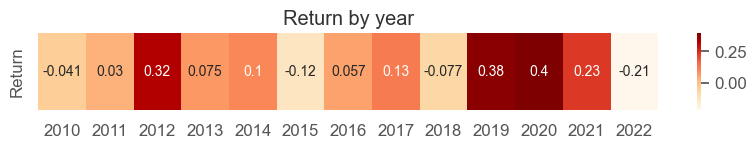


           Jan       Feb       Mar       Apr       May       Jun       Jul  \
2010 -0.073200  0.102719 -0.067123 -0.051488 -0.046694  0.044910  0.074737   
2011  0.012874 -0.128411  0.059392 -0.004671  0.006613 -0.032736 -0.000827   
2012  0.020959  0.224346 -0.042309 -0.055346 -0.060675 -0.053166  0.087556   
2013 -0.049736  0.045148  0.018449 -0.005846 -0.013318 -0.026695  0.023693   
2014 -0.047619  0.051912  0.035090 -0.002323  0.030818 -0.001193  0.055961   
2015 -0.019399  0.027119 -0.018112  0.063523 -0.007695 -0.026571 -0.057908   
2016  0.070790 -0.036401  0.034542  0.001374  0.046240 -0.067934  0.033077   
2017  0.008163  0.046050 -0.036176 -0.001877  0.005419  0.027212  0.004607   
2018  0.044316 -0.008699  0.044673 -0.076433 -0.024664  0.033048  0.026761   
2019 -0.054697  0.047728 -0.005088  0.059410 -0.001548 -0.023982 -0.017657   
2020 -0.108329  0.015305  0.024431  0.173229  0.014988  0.043594  0.083630   
2021  0.040996  0.060966 -0.007079  0.051716  0.004319  0.02265

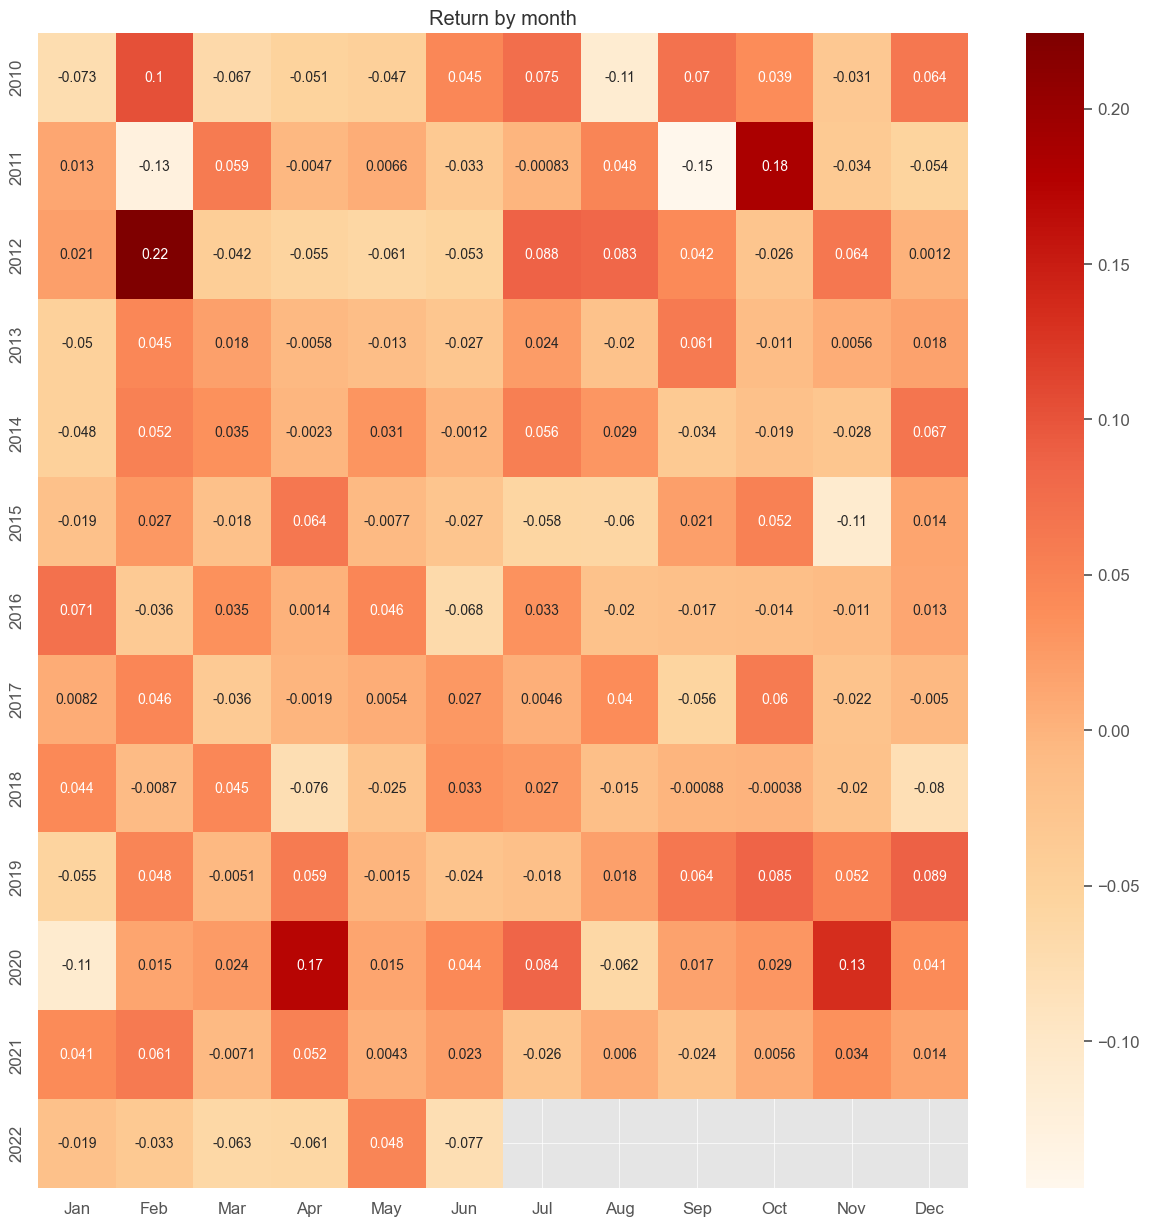

In [159]:
# 時間損益(年)
equity.index = pd.to_datetime(equity.index) #確保索引是datetime型態
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
year_ret = []
print(equity.index.year.unique())
for i in equity.index.year.unique():
    year_ret.append(equity[equity.index.year == i]['equity'].iloc[-1]/equity[equity.index.year == i]['equity'].iloc[0] - 1)

df = pd.DataFrame({'Return':year_ret},index = years)

# heatmap函式
py.figure(figsize=(10,1))
sns.heatmap(df.transpose(), annot=True, cmap='OrRd')
py.title('Return by year')
py.show()
print('')

# 時間損益(月)
group_data = equity.groupby([equity.index.year, equity.index.month])

month_ret = []
for group, data in group_data:
    month_ret.append(data['equity'].iloc[-1]/data['equity'].iloc[0] - 1)

month_ret_padded = np.append(month_ret, [np.nan] * (13*12 - len(month_ret)))
df = pd.DataFrame(np.array(month_ret_padded).reshape((13,12)), columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                    index = years)

print(df)
py.figure(figsize=(15,15))
sns.heatmap(df, annot=True, cmap='OrRd')
py.title('Return by month')
py.show()

[-0.023875224955009, -0.02001678053457989, 0.06511627906976744, -0.013504567721435191, -0.018747558911600053, -0.019747738565422345, 0.003796987723073029, 0.008605637316038913, -0.020098039215686276, -0.052346348072422715, -0.03117662405426559, -0.015222806531967894, 0.04346637506834336, 0.08131320127441474, -0.009943739369357583, -0.009977970714008034, -0.015673575129533678, 0.012519161982626469, -0.0056646525679758305, -0.02725340667583448, -0.043944681401059844, 0.012253321294982588, 0.050367926922100986, -0.014519277696437287, -0.024589166159464396, 0.05571305312461482, -0.020350212967345006, -0.006348826066123622, 0.08260609683203825, -0.01619156214367161, -0.015719330219842807, -0.005983291939489726, -0.007409070498428379, 0.006740058413839587, 0.0012349837206691366, 0.002554420257663261, -0.0048500881834215165, -0.04454545454545455, -0.0026555824962475466, 0.08290831455343375, -0.015447523852794184, 0.0031478358628442946, -0.024724061810154525, -0.009860403279415023, -0.02374875

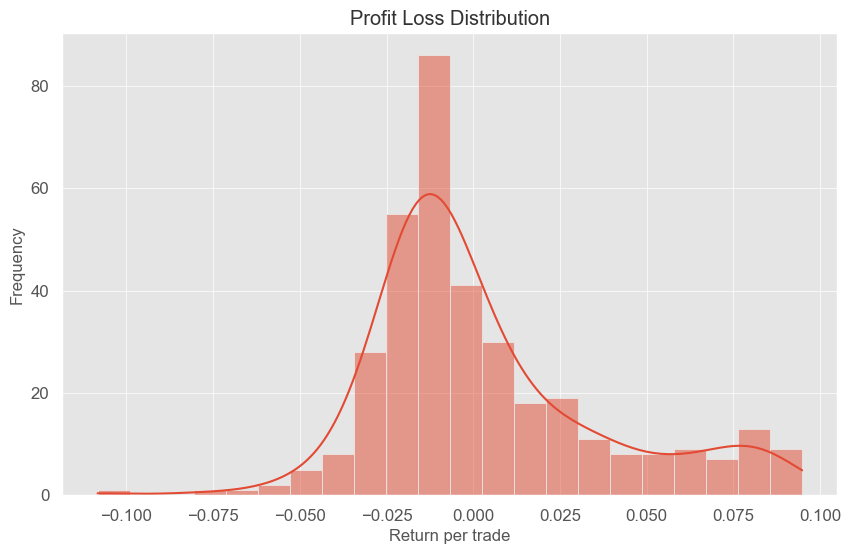

In [160]:
# 損益分布
print(rets)
sns.histplot(rets, kde=True)
py.xlabel('Return per trade')
py.ylabel('Frequency')
py.title('Profit Loss Distribution')
py.show()

datetime
2010-01-04 09:45:00    0.000000
2010-01-04 10:45:00    0.000000
2010-01-04 11:45:00    0.000000
2010-01-04 12:45:00    0.000000
2010-01-05 08:45:00    0.000000
                         ...   
2022-06-29 08:45:00   -0.019366
2022-06-29 09:45:00    0.008657
2022-06-29 10:45:00   -0.000134
2022-06-29 11:45:00   -0.006304
2022-06-29 12:45:00    0.001215
Name: equity, Length: 15342, dtype: float64


/Users/xinc./Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/xinc./Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/xinc./Library/Python/3.9/lib/python/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/stats.py:510: FutureWarning:

'M

                           Strategy
-------------------------  ----------
Start Period               2010-01-04
End Period                 2022-06-29
Risk-Free Rate             0.0%
Time in Market             48.0%

Cumulative Return          196.72%
CAGR﹪                     6.2%

Sharpe                     0.23
Prob. Sharpe Ratio         96.3%
Smart Sharpe               0.22
Sortino                    0.33
Smart Sortino              0.31
Sortino/√2                 0.23
Smart Sortino/√2           0.22
Omega                      1.07

Max Drawdown               -29.29%
Longest DD Days            1090
Volatility (ann.)          10.0%
Calmar                     0.21
Skew                       0.42
Kurtosis                   32.52

Expected Daily %           0.01%
Expected Monthly %         0.73%
Expected Yearly %          8.73%
Kelly Criterion            3.35%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.03%
Expected Shortfall (cVaR)  -1.03%

Max Consecutive Wins       1

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2012-03-14  2012-06-15  2012-11-30   261    -29.288574        -28.272251
2  2010-02-22  2010-06-11  2011-09-01   556    -29.146568        -27.940631
3  2022-01-05  2022-06-29  2022-06-29   176    -23.384631        -22.980465
4  2011-09-01  2011-09-20  2012-02-03   156    -22.372317        -19.670614
5  2018-01-23  2019-01-16  2019-10-15   631    -21.446106        -21.044410

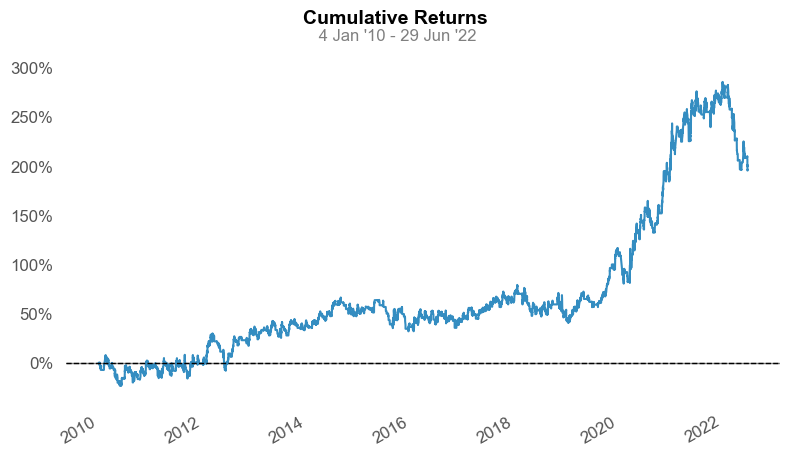

/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/wrappers.py:565: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.

/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/wrappers.py:568: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/core.py:440: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



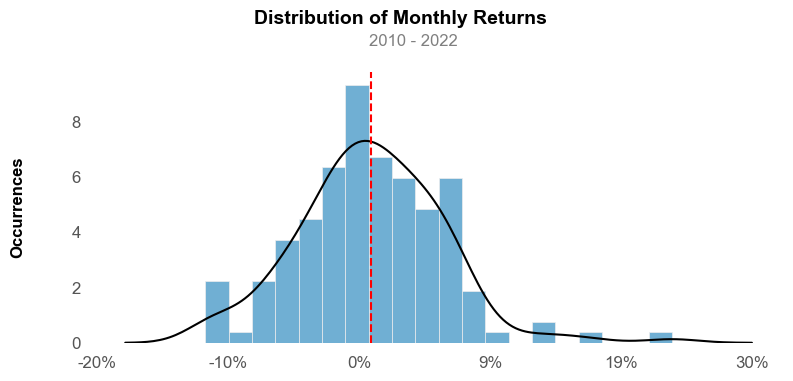

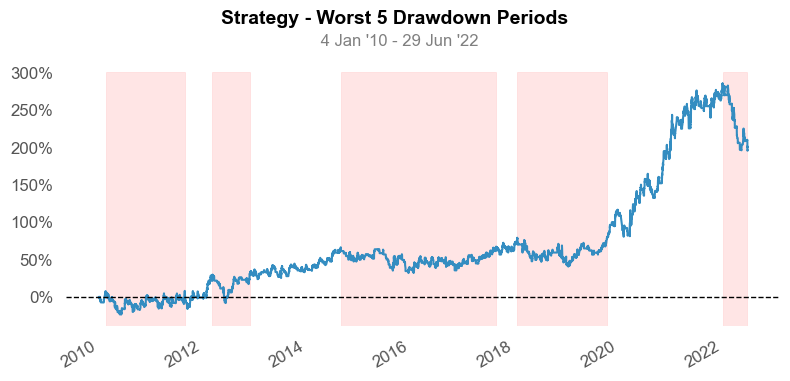

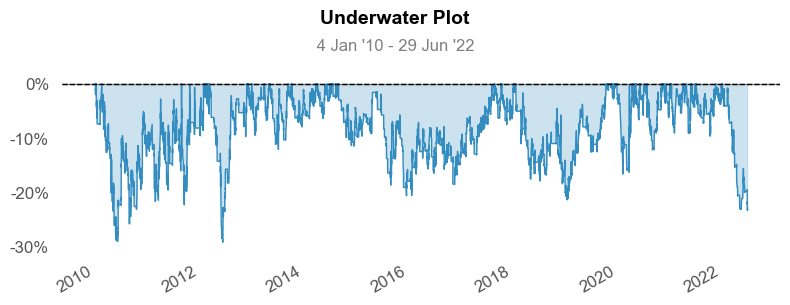

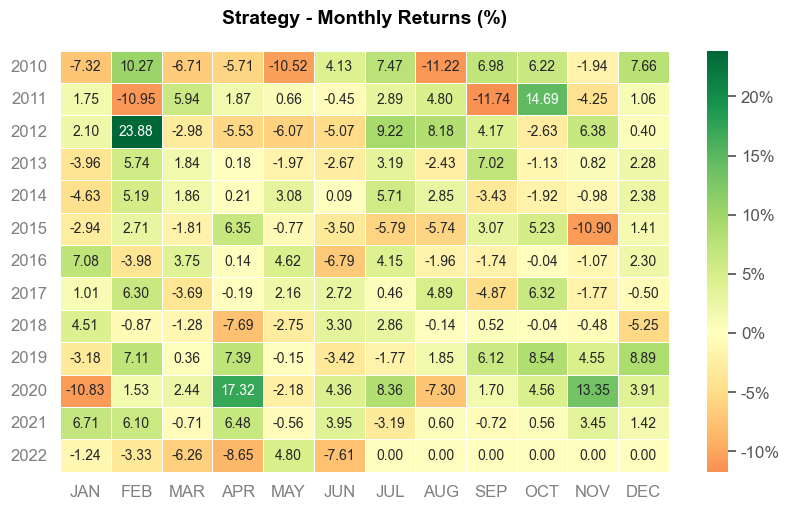

/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/core.py:1016: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/core.py:1018: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/Users/xinc./Library/Python/3.9/lib/python/site-packages/quantstats/_plotting/core.py:1019: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment usi

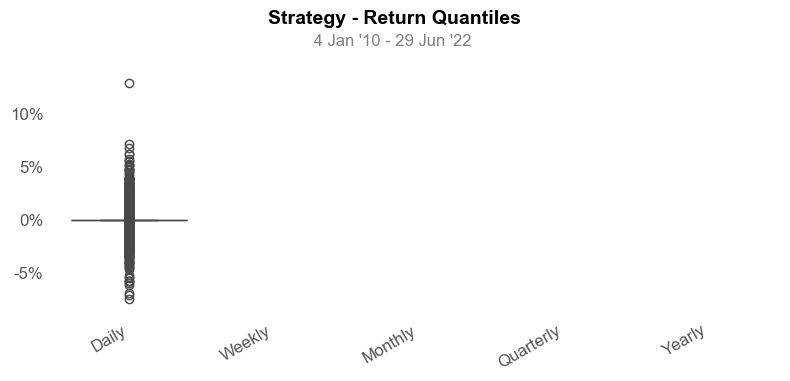

In [161]:
# quantstats回測報表
import quantstats
ret = equity['equity'].pct_change(periods=1).dropna()
print(ret)
quantstats.reports.full(ret)
#quantstats.reports.html(ret,output='stats.html',title='backtest result',download_filename='result.html')

para optimal-再怎麼樣的xy中得到更好的z

In [162]:
optimizationList = []
fund = 1000000
feePaid = 600
length = 15
NumStd = 1.5

# 做多加碼版本
# 最佳化參數：length & NumStd
for length in range(10,110,10):
    for stdTimes in np.arange(0.5, 3, 0.5):

        stdTimes = np.round(stdTimes,1)

        print('----------')
        print(f'length: {length}')
        print(f'stdTimes: {stdTimes}')

        trainData['MA'] = trainData['close'].rolling(window=length, center=False).mean()
        trainData['STD'] = trainData['close'].rolling(window=length, center=False).std()
        trainData['upLine'] = trainData['MA'] + stdTimes*trainData['STD']
        trainData['downLine'] = trainData['MA'] - stdTimes*trainData['STD']

        #df['ma'] = df['close'].rolling(window=length, center=False).mean()
        #df['std'] = df['close'].rolling(window=length, center=False).std()

        df_arr = np.array(trainData)
        time_arr = np.array(trainData.index)
        date_arr = [pd.to_datetime(i).date() for i in time_arr]

        BS = None
        Position = 0
        buy_price = 0
        add_price = 0
        buy = []
        sell = []
        profit_list = [0]
        profit_fee_list = [0]
        profit_fee_list_realized = []
        cost_list = []
        rets = []

        for i in range(len(df_arr)):

            #回測期間最後一天就跳出這個迴圈
            if i == len(df_arr)-1:
                break

            ## 進場邏輯
            #當收盤價突破布林上軌
            entryLong = df_arr[i,3] > df_arr[i,8]
            #結算日不進場
            entryCondition = date_arr[i] not in settlementDate

            ## 出場邏輯
            ### 當收盤價跌破布林下軌
            exitShort = df_arr[i,3] <= df_arr[i,9]
            ### 結算日時放到結算
            exitCondition = date_arr[i] in settlementDate and df_arr[i,5] >= 11


            ## 停利停損邏輯
            if BS == 'B':
                stopLoss = df_arr[i,3] <= df_arr[t,0] * (1-K)
                stopProfit = df_arr[i,3] >= df_arr[t,0] * (1+K)
                #做多狀態的加碼條件
                add_condition = df_arr[i, 0] > buy_price

        #     if exitCondition == True:
        #         print(f'{time_arr[i]}')

            if (BS == None) & (Position == 0):

                profit_list.append(0)
                profit_fee_list.append(0)

                if entryLong and entryCondition:
                    BS = 'B'
                    Position = 1
                    t = i+1
                    buy_price = df_arr[i+1, 0]
                    #將第一次進場成本紀錄在這個list中
                    cost_list.append(buy_price)
                    buy.append(t)

            elif BS == 'B':

                profit = 200 * (df_arr[i+1,0] - df_arr[i,0]) * Position
                profit_list.append(profit)


                if exitShort or i == len(df_arr)-2 or exitCondition or stopLoss or stopProfit:
                    if Position > 1:
                        pl_round = 200 * ((Position*df_arr[i+1,0]) - np.sum(cost_list[-2:]))
                    else:
                        pl_round = 200 * ((Position*df_arr[i+1,0]) - cost_list[-1])
                    profit_fee = profit - feePaid*2*Position
                    profit_fee_list.append(profit_fee)
                    sell.append(i+1)

                    # Realized PnL
                    profit_fee_realized = pl_round - feePaid*2*Position
                    profit_fee_list_realized.append(profit_fee_realized)
                    rets.append(profit_fee_realized/(200*df_arr[t,0]))
                    #重置交易狀態
                    BS = None
                    #重置部位數量
                    Position = 0
                    #重置加碼參考價
                    buy_price = 0
                    #重置加碼成本
                    add_price = 0


                #確認部位上限&加碼條件成立
                elif (Position <= 1) & add_condition:
                    #更改部位數量
                    add_price = df_arr[i+1, 0]
                    #將第一次進場成本紀錄在這個list中
                    cost_list.append(add_price)
                    Position += 1

                    profit_fee = profit
                    profit_fee_list.append(profit_fee)

        #             print("time: {}, Buy price: {} < Market Price: {}".format(time_arr[i], buy_price, df_arr[i, 0]))
        #             print("add position at {}, {}".format(time_arr[i+1], df_arr[i+1, 0]))
        #             print()

                else:
                    profit_fee = profit
                    profit_fee_list.append(profit_fee)


        equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=trainData.index)
        equity['equity'] = equity['profitfee'] + fund
        equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
        equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
        ret = equity['equity'][-1]/equity['equity'][0] - 1
        mdd = abs(equity['drawdown_percent'].min())
        calmarRatio = ret / mdd

        optimizationList.append([length, stdTimes, ret, calmarRatio])

print(optimizationList)

----------
length: 10
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 10
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 10
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 10
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 10
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 20
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 20
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 20
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 20
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 20
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 30
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 30
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 30
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 30
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 30
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 40
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 40
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 40
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 40
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 40
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 50
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 50
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 50
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 50
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 50
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 60
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 60
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 60
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 60
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 60
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 70
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 70
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 70
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 70
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 70
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 80
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 80
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 80
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 80
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 80
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 90
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 90
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 90
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 90
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 90
stdTimes: 2.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 100
stdTimes: 0.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 100
stdTimes: 1.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 100
stdTimes: 1.5


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 100
stdTimes: 2.0


/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



----------
length: 100
stdTimes: 2.5
[[10, 0.5, 1.0594000000000001, 1.6639692579505303], [10, 1.0, 0.9426000000000001, 0.8400340453938586], [10, 1.5, 1.04, 1.1543051135158073], [10, 2.0, 1.9418000000000002, 5.975588590235875], [10, 2.5, -0.2522, -0.4306587055261165], [20, 0.5, 2.1562, 5.075735102803739], [20, 1.0, 2.2376, 5.978947293064877], [20, 1.5, 3.2990000000000004, 11.575464655560559], [20, 2.0, 2.2658, 5.02272420212766], [20, 2.5, 1.1934, 2.2105954907891117], [30, 0.5, 2.0164, 4.886782026768642], [30, 1.0, 2.911, 6.373955844155844], [30, 1.5, 3.3369999999999997, 6.762177419354838], [30, 2.0, 1.44, 1.3241526175687666], [30, 2.5, -0.44399999999999995, -0.4495823615160349], [40, 0.5, 3.1352, 7.2955688741721865], [40, 1.0, 3.3826, 7.980235920177384], [40, 1.5, 2.717, 4.4723474320241685], [40, 2.0, 1.4014000000000002, 2.1518802547770703], [40, 2.5, 0.0613999999999999, 0.0948668771526979], [50, 0.5, 3.2096, 7.748361354252684], [50, 1.0, 2.9478, 6.798116300366301], [50, 1.5, 2.4328, 3.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/989832098.py:138: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [163]:
optResult = pd.DataFrame(optimizationList, columns=['length','stdTimes','ret','calmarRatio'])
optResult

length  stdTimes     ret  calmarRatio
0       10       0.5  1.0594     1.663969
1       10       1.0  0.9426     0.840034
2       10       1.5  1.0400     1.154305
3       10       2.0  1.9418     5.975589
4       10       2.5 -0.2522    -0.430659
5       20       0.5  2.1562     5.075735
6       20       1.0  2.2376     5.978947
7       20       1.5  3.2990    11.575465
8       20       2.0  2.2658     5.022724
9       20       2.5  1.1934     2.210595
10      30       0.5  2.0164     4.886782
11      30       1.0  2.9110     6.373956
12      30       1.5  3.3370     6.762177
13      30       2.0  1.4400     1.324153
14      30       2.5 -0.4440    -0.449582
15      40       0.5  3.1352     7.295569
16      40       1.0  3.3826     7.980236
17      40       1.5  2.7170     4.472347
18      40       2.0  1.4014     2.151880
19      40       2.5  0.0614     0.094867
20      50       0.5  3.2096     7.748361
21      50       1.0  2.9478     6.798116
22      50       1.5  2.4328     3.763357
23      50       2.0  1.5668     1.731093
24      50       2.5  0.5780     1.086697
25      60       0.5  3.1380     6.642730
26      60       1.0  2.7184     4.732228
27      60       1.5  2.0392     3.293183
28      60       2.0  1.5600     3.242041
29      60       2.5  1.3596     2.956909
30      70       0.5  3.5776     8.937022
31      70       1.0  2.1212     3.197212
32      70       1.5  2.2278     4.366146
33      70       2.0  1.7506     3.492903
34      70       2.5  1.5212     4.503003
35      80       0.5  2.9898     5.465100
36      80       1.0  1.8584     2.501692
37      80       1.5  1.6122     2.369934
38      80       2.0  1.4428     2.948245
39      80       2.5  1.3808     3.561563
40      90       0.5  3.0098     5.838768
41      90       1.0  2.2304     3.351619
42      90       1.5  1.3674     2.038253
43      90       2.0  1.0644     1.429609
44      90       2.5  1.1398     2.447897
45     100       0.5  2.5858     5.764998
46     100       1.0  2.6638     4.640782
47     100       1.5  1.1988     1.682953
48     100       2.0  1.0416     1.673756
49     100       2.5  0.9872     1.649196

In [164]:
optResult[(optResult['stdTimes'] == 2)].sort_values('ret', ascending=False).iloc[:5]

length  stdTimes     ret  calmarRatio
8       20       2.0  2.2658     5.022724
3       10       2.0  1.9418     5.975589
33      70       2.0  1.7506     3.492903
23      50       2.0  1.5668     1.731093
28      60       2.0  1.5600     3.242041

In [165]:
import plotly
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
pyo.init_notebook_mode()

import plotly.io as io
#io.renderers.default='browser'

In [166]:
x = np.arange(10,110,10)
y = np.arange(0.5,3,0.5)
x1, y1 = np.meshgrid(x, y)
z = np.zeros((5,10))

for x in range(0,5):
    for y in range(0,10):
        filter1 = (optResult['length']==x1[x,y])
        filter2 = (optResult['stdTimes']==y1[x,y])
        #print(vol_quote[filter1][filter2]['Value'].values[0])
        z[x,y] = optResult[filter1][filter2]['ret'].values[0]
print(z)

fig = go.Figure(data=[go.Surface(x=x1, y=y1, z=z)])
fig.update_layout(title='Surface', autosize=False, width=500, height=500,
                          margin=dict(l=50, r=50, b=50, t=50))
#plotly.offline.plot(fig, filename='ret.html')
fig.show(renderer="colab")

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1838675426.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gd

[[ 1.0594  2.1562  2.0164  3.1352  3.2096  3.138   3.5776  2.9898  3.0098
   2.5858]
 [ 0.9426  2.2376  2.911   3.3826  2.9478  2.7184  2.1212  1.8584  2.2304
   2.6638]
 [ 1.04    3.299   3.337   2.717   2.4328  2.0392  2.2278  1.6122  1.3674
   1.1988]
 [ 1.9418  2.2658  1.44    1.4014  1.5668  1.56    1.7506  1.4428  1.0644
   1.0416]
 [-0.2522  1.1934 -0.444   0.0614  0.578   1.3596  1.5212  1.3808  1.1398
   0.9872]]


In [167]:
x = np.arange(10,110,10)
y = np.arange(0.5,3,0.5)
x1, y1 = np.meshgrid(x, y)
z = np.zeros((5,10))

for x in range(0,5):
    for y in range(0,10):
        filter1 = (optResult['length']==x1[x,y])
        filter2 = (optResult['stdTimes']==y1[x,y])
        #print(vol_quote[filter1][filter2]['Value'].values[0])
        z[x,y] = optResult[filter1][filter2]['calmarRatio'].values[0]

fig = go.Figure(data=[go.Surface(x=x1, y=y1, z=z)])
fig.update_layout(title='Surface', autosize=False, width=500, height=500,
                          margin=dict(l=50, r=50, b=50, t=50))
#plotly.offline.plot(fig, filename='calmarRation.html')
fig.show(renderer="colab")

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gdjc81900000gn/T/ipykernel_40222/1934709888.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/0j/sdf7gd116kd5lv12gd